In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
skin_cancer_df = pd.read_csv('..//Data//HAM10000_metadata.csv')
clean_skin_df = skin_cancer_df.dropna(axis= 'rows')
clean_skin_df = skin_cancer_df.dropna(axis= 'rows')
clean_skin_df = clean_skin_df.loc[clean_skin_df['sex'] != 'unknown']
clean_skin_df = clean_skin_df.loc[clean_skin_df['localization'] != 'unknown']
clean_skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
#  clean_skin_df = clean_skin_df.set_index('bkl')
# clean_skin_df.head()

to_drop = ['lesion_id',
            'image_id',
            'dx_type',
           'localization',
           'sex',
            'dx_type'
          ]

clean_skin_df.drop(to_drop, inplace=True, axis=1)

In [4]:
 clean_skin_df.value_counts()

dx     age 
nv     45.0    1081
       50.0     924
       40.0     788
       55.0     668
       35.0     653
               ... 
df     25.0       2
akiec  30.0       1
bkl    5.0        1
bcc    20.0       1
mel    5.0        1
Length: 102, dtype: int64

In [5]:
#clean_skin_df['dx'].is_unique
clean_skin_df = clean_skin_df.set_index('dx')
bkl_dx=clean_skin_df.loc["mel"]
bkl=bkl_dx.value_counts()
print(bkl)
nv_dx=clean_skin_df.loc["nv"]
nv=nv_dx.value_counts()
print(nv)

age 
70.0    164
55.0    142
65.0    133
60.0    106
50.0     96
75.0     87
80.0     83
85.0     76
45.0     72
40.0     49
35.0     36
30.0     34
25.0     16
20.0      6
5.0       1
dtype: int64
age 
45.0    1081
50.0     924
40.0     788
55.0     668
35.0     653
60.0     440
30.0     406
65.0     351
70.0     245
75.0     230
25.0     197
20.0     158
80.0      96
5.0       81
15.0      73
10.0      37
85.0      35
0.0       28
dtype: int64


KeyError: 'Columns not found: 96, 1, 34, 164, 133, 36, 6, 72, 106, 76, 142, 16, 49, 83, 87'

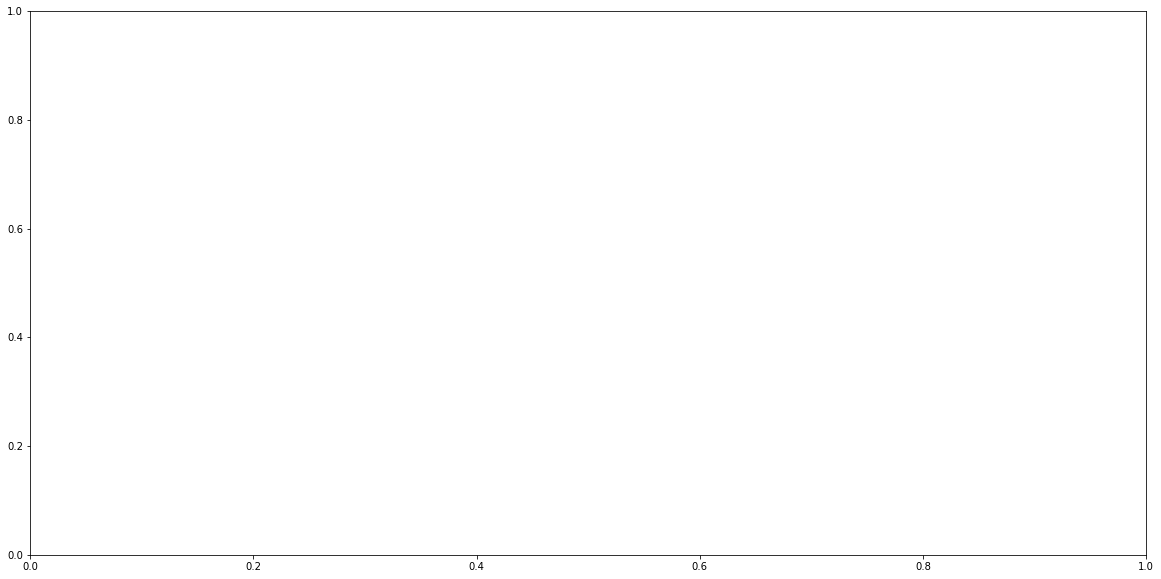

In [6]:
 # Create a boxplot to compare means
clean_skin_df.boxplot(bkl, by=nv, figsize=(20, 10))